In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os

cwd = os.getcwd()  # Get the current working directory (cwd)
files = os.listdir(cwd)  # Get all the files in that directory
print("Files in %r: %s" % (cwd, files))

Files in '/content': ['.config', 'drive', 'sample_data']


# Dataset

https://www.kaggle.com/datasets/nehalbirla/vehicle-dataset-from-cardekho?datasetId=33080&sortBy=voteCount&select=car+data.csv

# Import libraries and load the dataset

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.model_selection import train_test_split, cross_validate, cross_val_score
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
import math

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [4]:
df=pd.read_csv('car data.csv')
df

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


# EDA

In [5]:
df.dtypes

Car_Name          object
Year               int64
Selling_Price    float64
Present_Price    float64
Kms_Driven         int64
Fuel_Type         object
Seller_Type       object
Transmission      object
Owner              int64
dtype: object

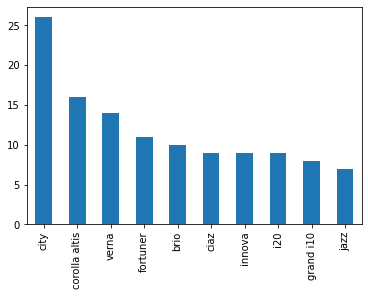

In [6]:
df['Car_Name'].value_counts().head(10).plot(kind='bar')

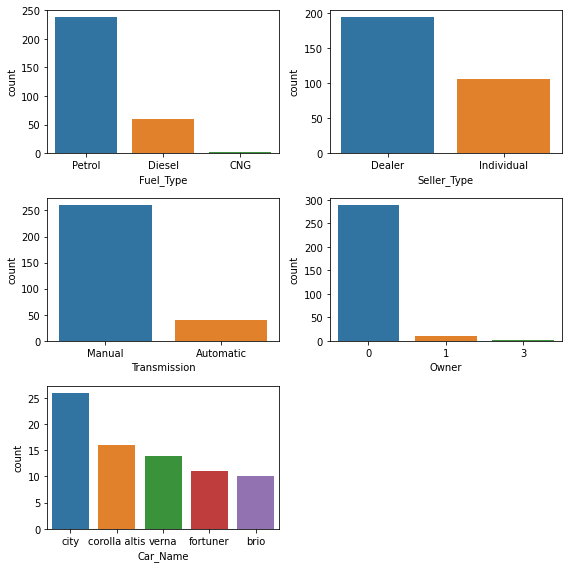

In [7]:
cont=['Selling_Price', 'Present_Price', 'Kms_Driven', 'Year']
cat=[i for i in df.columns if i not in cont]
cat.remove('Car_Name')

plt.figure(figsize=(8,8))
for i, el in enumerate(cat, 1):
    plt.subplot(3,2,i)
    sns.countplot(x=df[el])
    # plt.xticks(rotation=45)
plt.subplot(3,2,5)
sns.countplot(x=df['Car_Name'], order=df.Car_Name.value_counts().iloc[:5].index)
plt.tight_layout()

In [8]:
df['Car_Name'].value_counts()

city                        26
corolla altis               16
verna                       14
fortuner                    11
brio                        10
                            ..
Honda CB Trigger             1
Yamaha FZ S                  1
Bajaj Pulsar 135 LS          1
Activa 4g                    1
Bajaj Avenger Street 220     1
Name: Car_Name, Length: 98, dtype: int64

In [9]:
df[df['Fuel_Type']=='Petrol'].sample(3)

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
105,KTM RC390,2015,1.35,2.37,21700,Petrol,Individual,Manual,0
75,etios g,2015,3.95,6.80,36000,Petrol,Dealer,Manual,0
266,amaze,2014,3.65,7.00,35000,Petrol,Dealer,Manual,0


In [10]:
df[df['Fuel_Type']=='Diesel'].sample(3)

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
5,vitara brezza,2018,9.25,9.83,2071,Diesel,Dealer,Manual,0
9,ciaz,2015,7.45,8.92,42367,Diesel,Dealer,Manual,0
74,etios cross,2014,4.90,8.93,83000,Diesel,Dealer,Manual,0


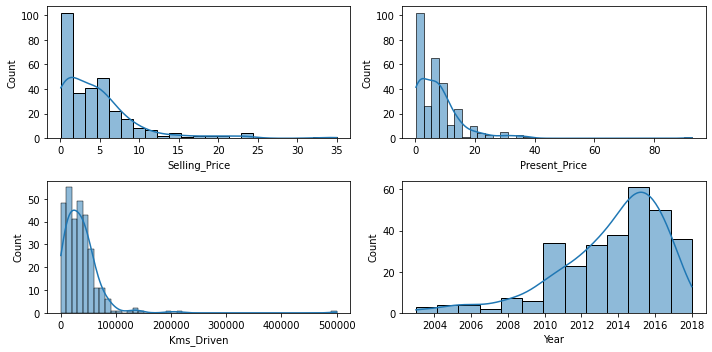

In [11]:
plt.figure(figsize=(10,5))
for i, el in enumerate(cont, 1):
    plt.subplot(2,2,i)
    sns.histplot(x=df[el], kde=True)

plt.tight_layout()

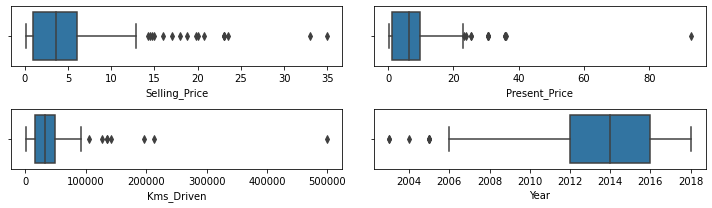

In [12]:
plt.figure(figsize=(10,3))
for i, el in enumerate(cont, 1):
    plt.subplot(2,2,i)
    sns.boxplot(x=df[el])

plt.tight_layout()

In [13]:
df[df['Selling_Price']>30]

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
64,fortuner,2017,33.0,36.23,6000,Diesel,Dealer,Automatic,0
86,land cruiser,2010,35.0,92.60,78000,Diesel,Dealer,Manual,0


In [14]:
df[df['Present_Price']>80]

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
86,land cruiser,2010,35.0,92.6,78000,Diesel,Dealer,Manual,0


In [15]:
df[df['Kms_Driven']>400000]

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
196,Activa 3g,2008,0.17,0.52,500000,Petrol,Individual,Automatic,0


In [16]:
# Checking Null value
df.isna().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [17]:
df['Year'].value_counts()

2015    61
2016    50
2014    38
2017    35
2013    33
2012    23
2011    19
2010    15
2008     7
2009     6
2006     4
2005     4
2003     2
2007     2
2018     1
2004     1
Name: Year, dtype: int64

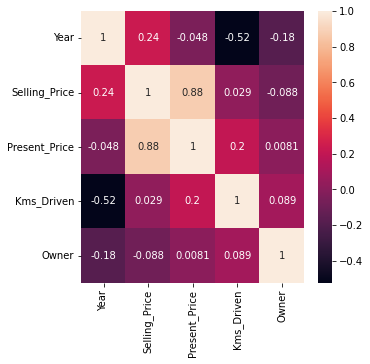

In [18]:
plt.figure(figsize=(5,5))
sns.heatmap(df.corr(), annot=True)

# Data Preprocessing

### Outliers Removal

In [19]:
def outlier_percentile(df, ft):
    min_threshold, max_threshold=df[ft].quantile([0.001, 0.999])
    df = df[(df[ft]>min_threshold) & (df[ft]<max_threshold)]
    return df

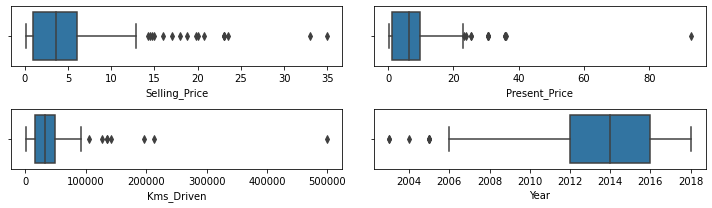

In [20]:
plt.figure(figsize=(10,3))
for i, el in enumerate(cont, 1):
    plt.subplot(2,2,i)
    sns.boxplot(x=df[el])

plt.tight_layout()

In [21]:
df.shape

(301, 9)

In [22]:
cont

['Selling_Price', 'Present_Price', 'Kms_Driven', 'Year']

In [23]:
df=outlier_percentile(df, 'Selling_Price')
df=outlier_percentile(df, 'Kms_Driven')

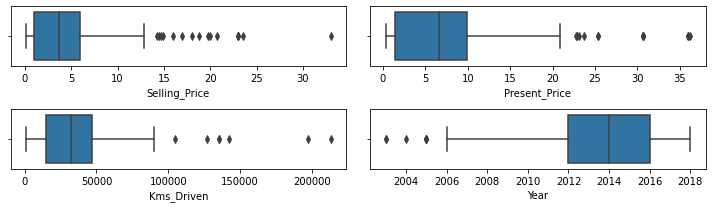

In [24]:
plt.figure(figsize=(10,3))
for i, el in enumerate(cont, 1):
    plt.subplot(2,2,i)
    sns.boxplot(x=df[el])

plt.tight_layout()

In [25]:
df

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


## FE

In [26]:
df['Age']=2022-df['Year']
df.drop(['Year'], axis=1, inplace=True)
df

,Car_Name,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Age
0,ritz,3.35,5.59,27000,Petrol,Dealer,Manual,0,8
1,sx4,4.75,9.54,43000,Diesel,Dealer,Manual,0,9
2,ciaz,7.25,9.85,6900,Petrol,Dealer,Manual,0,5
3,wagon r,2.85,4.15,5200,Petrol,Dealer,Manual,0,11
4,swift,4.60,6.87,42450,Diesel,Dealer,Manual,0,8
...,...,...,...,...,...,...,...,...,...
296,city,9.50,11.60,33988,Diesel,Dealer,Manual,0,6
297,brio,4.00,5.90,60000,Petrol,Dealer,Manual,0,7
298,city,3.35,11.00,87934,Petrol,Dealer,Manual,0,13
299,city,11.50,12.50,9000,Diesel,Dealer,Manual,0,5


From the categorical visualization, it seems that owner is ordinal variabel. Let's group them and see about the median price for each of them

Let's encode other categorical variable by One-Hot / get dummies

In [27]:
nom=['Fuel_Type', 'Seller_Type', 'Transmission']
for i in nom:
    df=pd.get_dummies(df, prefix=[i], columns=[i], drop_first=True)

df

,Car_Name,Selling_Price,Present_Price,Kms_Driven,Owner,Age,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,ritz,3.35,5.59,27000,0,8,0,1,0,1
1,sx4,4.75,9.54,43000,0,9,1,0,0,1
2,ciaz,7.25,9.85,6900,0,5,0,1,0,1
3,wagon r,2.85,4.15,5200,0,11,0,1,0,1
4,swift,4.60,6.87,42450,0,8,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...
296,city,9.50,11.60,33988,0,6,1,0,0,1
297,brio,4.00,5.90,60000,0,7,0,1,0,1
298,city,3.35,11.00,87934,0,13,0,1,0,1
299,city,11.50,12.50,9000,0,5,1,0,0,1


# Train Test Split

In [28]:
# X=df.drop(['selling_price'], axis=1)
# y=df['selling_price']


# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

df_train, df_test = train_test_split(df, test_size=0.2, random_state=42)

In [29]:
df_car_name=df_test['Car_Name']
df_car_name.reset_index(drop=True, inplace=True)
df_train.drop(['Car_Name'], axis=1, inplace=True)
df_test.drop(['Car_Name'], axis=1, inplace=True)

In [30]:
df_train

,Selling_Price,Present_Price,Kms_Driven,Owner,Age,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
63,23.50,35.96,47000,0,7,1,0,0,0
17,7.75,10.79,43000,0,6,1,0,0,1
220,3.50,4.43,38488,0,5,0,1,0,1
224,5.11,9.40,36198,0,9,0,1,0,0
186,0.25,0.52,22000,0,12,0,1,1,0
...,...,...,...,...,...,...,...,...,...
191,0.20,0.57,25000,1,10,0,1,1,1
71,4.50,12.48,45000,0,11,1,0,0,1
107,1.25,1.50,15000,0,9,0,1,1,1
275,10.90,13.60,30753,0,6,0,1,0,0


In [31]:
# Standardize Continuous feature
sc1 = StandardScaler()
sc2 = StandardScaler()


# X_train.iloc[:, 0:3] = sc.fit_transform(X_train.iloc[:, 0:3]) # .loc[:, ['km_driven', 'age', 'owner_ordinal']]
# X_test.iloc[:, 0:3] = sc.transform(X_test.iloc[:, 0:3])

feat=['Present_Price', 'Kms_Driven', 'Age']
feat_target=['Selling_Price']

df_train[feat] = sc1.fit_transform(df_train[feat])
# df_train[feat_target] = sc2.fit_transform(df_train[feat_target])
df_test[feat] = sc1.transform(df_test[feat])
# df_test[feat_target] = sc2.transform(df_test[feat_target])

X_train = df_train.drop('Selling_Price', axis=1)
y_train = df_train['Selling_Price']

X_test = df_test.drop('Selling_Price', axis=1)
y_test = df_test['Selling_Price']

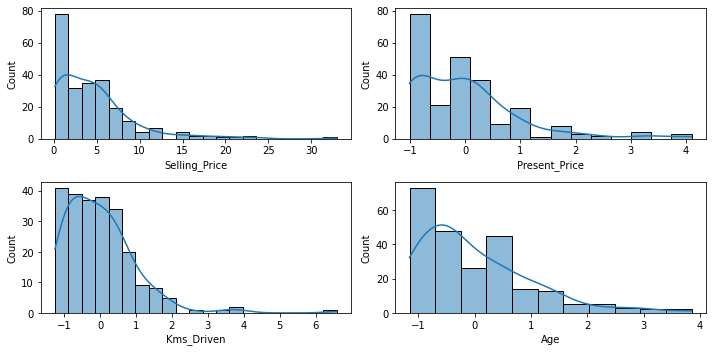

In [32]:
x=['Selling_Price', 'Present_Price', 'Kms_Driven', 'Age']
plt.figure(figsize=(10,5))
for i, el in enumerate(x, 1):
    plt.subplot(2,2,i)
    sns.histplot(x=df_train[el], kde=True)

plt.tight_layout()

In [33]:
X_train.shape, X_test.shape

((236, 8), (60, 8))

# Modeling

##### Linear Regression from scratch

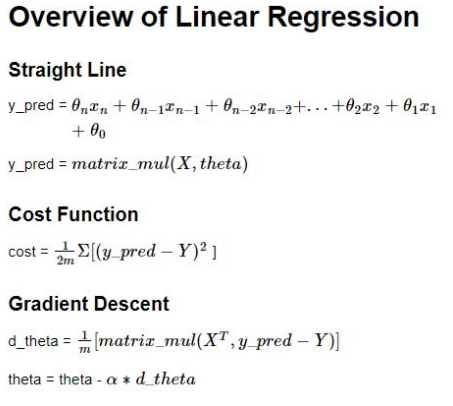

In [34]:
# Reshaping data
X_train_scratch = np.vstack((np.ones((X_train.shape[0], )), X_train.T)).T
X_test_scratch = np.vstack((np.ones((X_test.shape[0], )), X_test.T)).T

y_train_scratch = y_train.values.reshape(df_train.values.shape[0],1)
y_test_scratch = y_test.values.reshape(df_test.values.shape[0],1)

In [35]:
print(X_train_scratch.shape)
print(y_train_scratch.shape)
print(X_test_scratch.shape)
print(y_test_scratch.shape)

(236, 9)
(236, 1)
(60, 9)
(60, 1)


In [36]:
# Linear regression function (same as the picture)
def linreg_gd(X, Y, learning_rate, iteration):
    m = Y.size
    theta = np.zeros((X.shape[1],1))
    cost_list = []

    for i in range(iteration):
        y_pred = np.dot(X, theta) # Calculating the dot product of features and theta
        cost = (1/(2*m)) * np.sum(np.square(y_pred - Y)) # Cost function

        d_theta = (1/m)*np.dot(X.T, y_pred - Y) # Gradient descent
        theta = theta - learning_rate*d_theta # Update the cost function

        cost_list.append(cost)
        if(i%(iteration/10) == 0):
            print("Cost of iteration-{} : {}".format(i, cost))

    return theta, cost_list

In [71]:
iter=100
lr=1e-1
lr_scratch, cost_list=linreg_gd(X_train_scratch, y_train_scratch, learning_rate=lr, iteration=iter)

Cost of iteration-0 : 21.73247987288136
Cost of iteration-10 : 2.988935775267465
Cost of iteration-20 : 1.6035690283932493
Cost of iteration-30 : 1.4117725024354768
Cost of iteration-40 : 1.3621954209409484
Cost of iteration-50 : 1.3373608522670009
Cost of iteration-60 : 1.3206768384329899
Cost of iteration-70 : 1.3082028563485828
Cost of iteration-80 : 1.298309197190062
Cost of iteration-90 : 1.290124665255999


Text(0, 0.5, 'Cost')

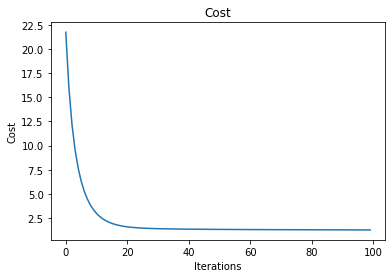

In [79]:
plt.plot(np.arange(0, iter), cost_list)
plt.title("Cost")
plt.xlabel("Iterations")
plt.ylabel("Cost")

In [73]:
X_test_scratch.shape[0]

60

In [74]:
y_train_pred = np.dot(X_train_scratch, lr_scratch)
train_mae = (1/X_train_scratch.shape[0]) * np.sum(np.abs(y_train_pred - y_train_scratch))
print("Train MAE : {}".format(train_mae))

Train MAE : 1.0704217262306266


##### Model Evaluation (MAE)
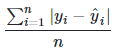 

In [75]:
y_pred = np.dot(X_test_scratch, lr_scratch)
test_mae = (1/X_test_scratch.shape[0]) * np.sum(np.abs(y_pred - y_test_scratch))

# print("MAE : {} %".format(round(error*100, 2)))
print("Test MAE : {}".format(test_mae))

Test MAE : 1.2315782008881841


### Rsquared and adjusted Rsquared

In [76]:
X = sm.add_constant(y_pred)
result = sm.OLS(y_test_scratch, X).fit()
print(result.rsquared, result.rsquared_adj)

0.878869060820473 0.8767805963518605


In [77]:
r2_score(y_test_scratch, y_pred)

0.8747584814092739

In [44]:
pd.DataFrame(np.concatenate((y_test_scratch, y_pred), axis=1), columns=['y_actual', 'y_prediction'])

,y_actual,y_prediction
0,6.25,3.295488
1,0.48,1.378459
2,3.49,2.588297
3,23.00,4.608456
4,3.65,2.245596
5,7.45,2.590363
6,1.95,1.644787
7,8.25,3.330402
8,5.75,1.745055
9,23.00,5.267898


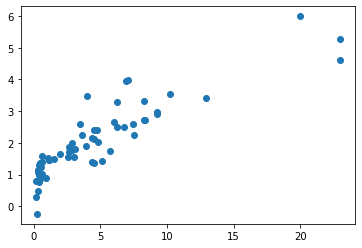

In [45]:
plt.scatter(y_test_scratch, y_pred)

#### Scikit Learn Linear Regression

In [46]:
# Evaluation metrics with 3-cross validation 
def rmse_cv(model):
    return -cross_val_score(model, X_train, y_train, scoring='neg_mean_absolute_error', cv=3)

In [47]:
lr_sklearn=LinearRegression()
rmse_cv(lr_sklearn).mean()

1.1174839472847864

In [48]:
lr_sklearn.fit(X_train, y_train)
prediction = lr_sklearn.predict(X_test)

In [49]:
error_score_training = mean_absolute_error(y_test, prediction)
print("MAE : {}".format(error_score_training))

MAE : 1.129117088254023


In [50]:
df1 = pd.DataFrame(y_test)
df2 = pd.DataFrame(np.reshape(prediction, (-1,1)), columns=['y_prediction'])
df1.reset_index(drop=True, inplace=True)
df1.rename(columns = {'Selling_Price':'y_actual'}, inplace = True)
df2.reset_index(drop=True, inplace=True)

df = pd.concat( [df1, df2], axis=1) 
df

,y_actual,y_prediction
0,6.25,7.892365
1,0.48,0.945685
2,3.49,2.448337
3,23.00,18.127070
4,3.65,4.324736
5,7.45,6.973895
6,1.95,2.060415
7,8.25,8.979605
8,5.75,5.234343
9,23.00,19.805498


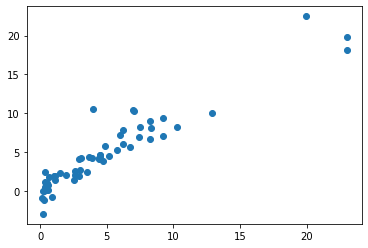

In [51]:
plt.scatter(y_test, prediction)

In [54]:
tes = pd.concat([X_test, y_test], axis=1)
X_test.reset_index(drop=True, inplace=True)
y_test.reset_index(drop=True, inplace=True)
df_result = pd.concat( [df2, y_test, X_test], axis=1)
feat2 = ['Selling_Price', 'Present_Price', 'Kms_Driven', 'Age']
feat_pred = ['y_prediction']
df_result[feat] = sc1.inverse_transform(df_result[feat])
# df_result[feat_target] = sc2.inverse_transform(df_result[feat_target])
# df_result[feat_pred] = sc2.inverse_transform(df_result[feat_pred])
df_result_full = pd.concat([df_car_name, df_result], axis=1)
df_result_full

,Car_Name,y_prediction,Selling_Price,Present_Price,Kms_Driven,Owner,Age,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,city,7.892365,6.25,13.600,40126.0,0,8.0,0,1,0,1
1,Yamaha FZ S V 2.0,0.945685,0.48,0.840,23000.0,0,7.0,0,1,1,1
2,innova,2.448337,3.49,13.460,197176.0,0,17.0,1,0,0,1
3,innova,18.127070,23.00,25.390,15000.0,0,5.0,1,0,0,0
4,amaze,4.324736,3.65,7.000,35000.0,0,8.0,0,1,0,1
5,ciaz,6.973895,7.45,8.920,42367.0,0,7.0,1,0,0,1
6,sx4,2.060415,1.95,7.150,58000.0,0,14.0,0,1,0,1
7,city,8.979605,8.25,14.000,63000.0,0,8.0,1,0,0,1
8,amaze,5.234343,5.75,7.500,44000.0,0,7.0,0,1,0,0
9,fortuner,19.805498,23.00,30.610,40000.0,0,7.0,1,0,0,0


https://towardsdatascience.com/linear-regression-using-gradient-descent-97a6c8700931

- KM, Usia, Transmisi, Jenis Penjual
- Karena dirasa lebih relevan dari pada yang lain.